### Importing necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

### Importing the data from google_stock_price_train.csv file.

In [2]:
df_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
#printing the first 10 rows of data.
df_data.head(10)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
#printing the last 10 rows of data.
df_data.tail(10)

,Date,Open,High,Low,Close,Volume
1248,12/16/2016,800.40,800.86,790.29,790.8,"2,443,800"
1249,12/19/2016,790.22,797.66,786.27,794.2,"1,232,100"
1250,12/20/2016,796.76,798.65,793.27,796.42,"951,000"
1251,12/21/2016,795.84,796.68,787.10,794.56,"1,211,300"
1252,12/22/2016,792.36,793.32,788.58,791.26,"972,200"
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [5]:
#Checking the missing values of the data.
df_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#### Google Stock Price Time Series for Open feature

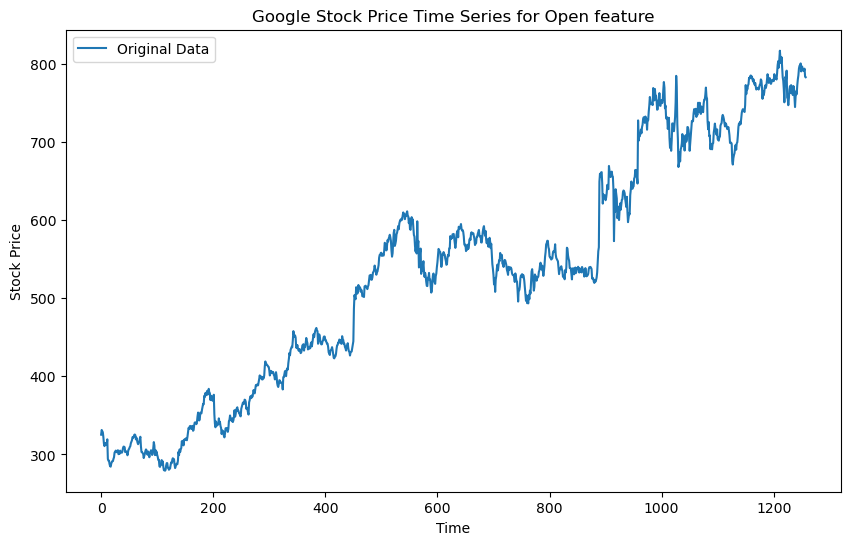

In [6]:
timeseries_open = df_data[["Open"]].values.astype('float32')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(timeseries_open, label='Original Data')
plt.title('Google Stock Price Time Series for Open feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Google Stock Price Time Series for High feature

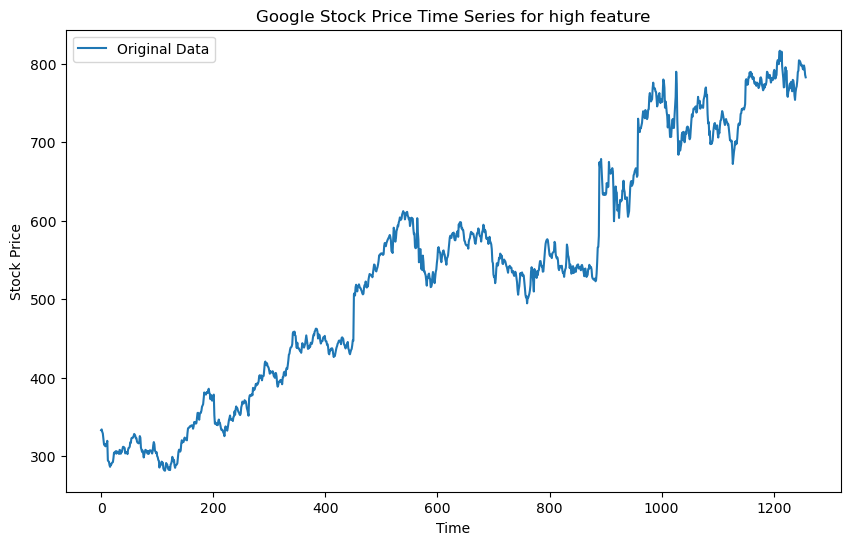

In [7]:
timeseries_high = df_data[["High"]].values.astype('float32')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(timeseries_high, label='Original Data')
plt.title('Google Stock Price Time Series for high feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Google Stock Price Time Series for Low feature

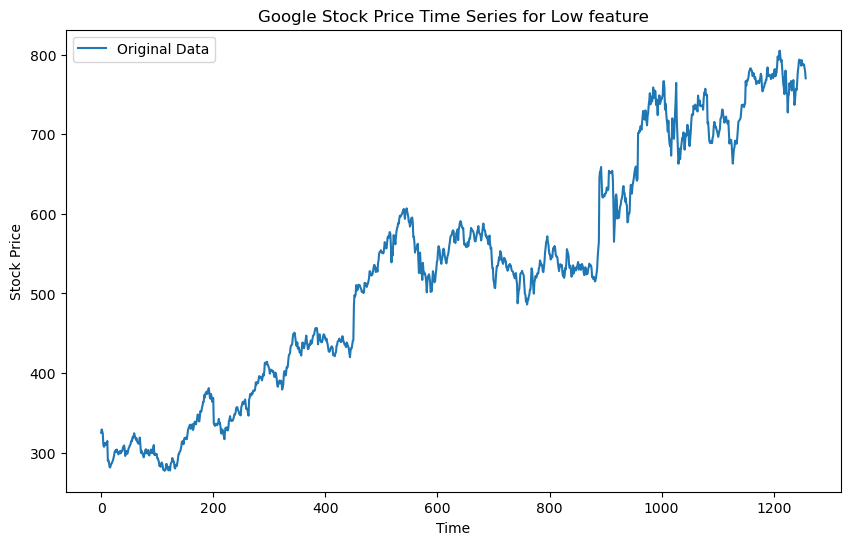

In [8]:
timeseries_low = df_data[["Low"]].values.astype('float32')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(timeseries_low, label='Original Data')
plt.title('Google Stock Price Time Series for Low feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Google Stock Price Time Series for Close feature

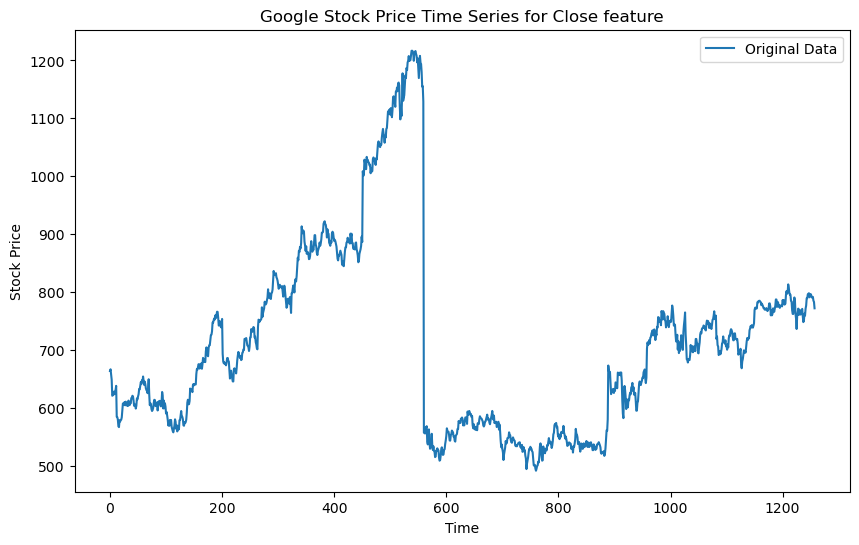

In [9]:
# Remove commas from Close column and convert to float
c = df_data['Close'].str.replace(',', '').astype(float)
timeseries_close = c.values.astype('float32')

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(timeseries_close, label='Original Data')
plt.title('Google Stock Price Time Series for Close feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#### Google Stock Price Time Series for Volume feature

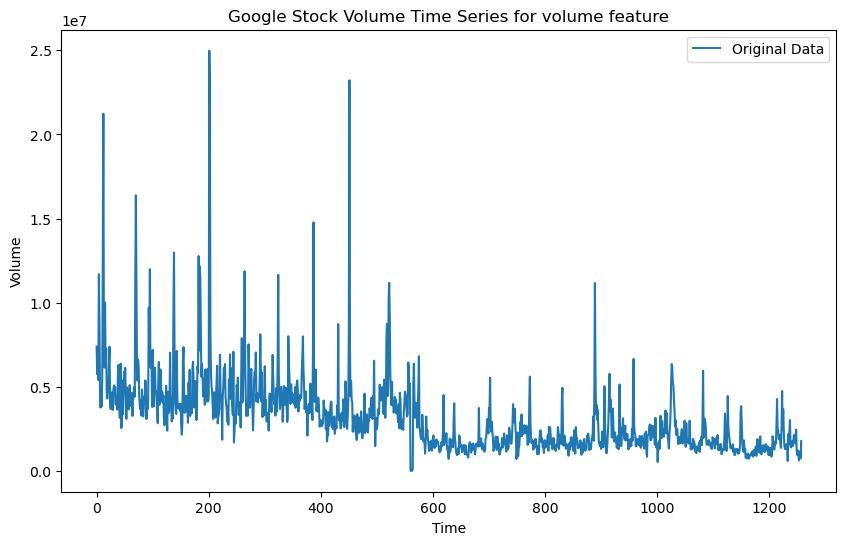

In [10]:
# Remove commas from Volume column and convert to float
df_data['Volume'] = df_data['Volume'].str.replace(',', '').astype(float)

# Plot the time series data
timeseries_volume = df_data[["Volume"]].values.astype('float32')
plt.figure(figsize=(10, 6))
plt.plot(timeseries_volume, label='Original Data')
plt.title('Google Stock Volume Time Series for volume feature')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Preprocessing the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df_data['Close'] = c
# Step 2: Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_transformed = scaler.fit_transform(df_data[['Open', 'High', 'Low', 'Close', 'Volume']].values.astype('float32'))


In [12]:
print(type(data_transformed))
print(data_transformed.shape)

<class 'numpy.ndarray'>
(1258, 5)


### Split into 80% train and 20% prediction

In [13]:
# train-test split for time series
train_size = int(len(data_transformed) * 0.80)
test_size = len(data_transformed) - train_size
train, test = data_transformed[:train_size], data_transformed[train_size:]

In [14]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 60
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([946, 60, 5]) torch.Size([946, 60, 5])
torch.Size([192, 60, 5]) torch.Size([192, 60, 5])


/var/folders/qj/q8gbxcrs53vfy71rslx47xxh0000gn/T/ipykernel_34502/1891389812.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(X), torch.tensor(y)


### Defining the LSTM Neural network model.

In [15]:
# Step 4: Define the LSTM model
class ComplexLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,output_size):
        super(ComplexLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = out 
        out = self.fc1(out)
        #print(out.shape)
        out = self.fc2(out)
        #print(out.shape)
        out = self.fc3(out)
        #print(out.shape)
        return out

# Step 5: Instantiate the model, define loss function and optimizer
input_size = X_train.shape[-1]
hidden_size = 64  # Adjust as needed
output_size = y_train.shape[-1]
num_layers = 2
dropout = 0.2
model = ComplexLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training the LSTM model

In [16]:
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 200
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        #print(X_batch.shape)
        #print(y_pred.shape)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print('Epoch '+str(epoch))
    # Validation
    if epoch % 10 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(criterion(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(criterion(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f, loss %.4f" % (epoch, train_rmse, test_rmse, loss))

Epoch 0: train RMSE 0.0642, test RMSE 0.0903, loss 0.0049
Epoch 10: train RMSE 0.0350, test RMSE 0.0225, loss 0.0007
Epoch 20: train RMSE 0.0336, test RMSE 0.0186, loss 0.0013
Epoch 30: train RMSE 0.0330, test RMSE 0.0203, loss 0.0006
Epoch 40: train RMSE 0.0326, test RMSE 0.0179, loss 0.0011
Epoch 50: train RMSE 0.0319, test RMSE 0.0175, loss 0.0006
Epoch 60: train RMSE 0.0316, test RMSE 0.0182, loss 0.0010
Epoch 70: train RMSE 0.0277, test RMSE 0.0193, loss 0.0002
Epoch 80: train RMSE 0.0259, test RMSE 0.0241, loss 0.0002
Epoch 90: train RMSE 0.0218, test RMSE 0.0203, loss 0.0004
Epoch 100: train RMSE 0.0216, test RMSE 0.0298, loss 0.0002
Epoch 110: train RMSE 0.0171, test RMSE 0.0280, loss 0.0002
Epoch 120: train RMSE 0.0168, test RMSE 0.0302, loss 0.0003
Epoch 130: train RMSE 0.0148, test RMSE 0.0323, loss 0.0002
Epoch 140: train RMSE 0.0144, test RMSE 0.0324, loss 0.0001
Epoch 150: train RMSE 0.0133, test RMSE 0.0331, loss 0.0011
Epoch 160: train RMSE 0.0129, test RMSE 0.0425, los

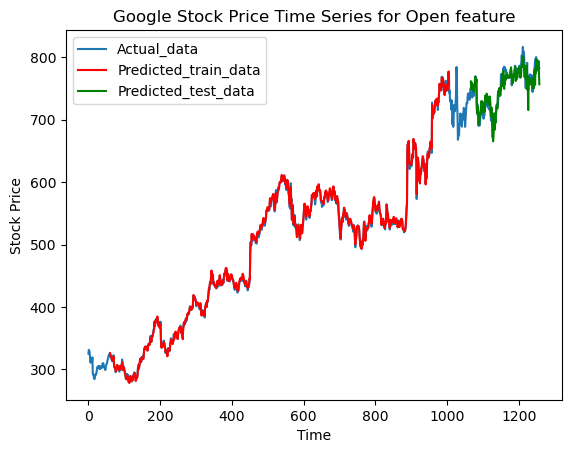

In [30]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot_open = np.ones_like(timeseries_open) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    #print(X_train.shape)
    #print(model(X_train)[:, -1, :].reshape(-1,5)[:,].shape)
    y_pred_train = scaler.inverse_transform(model(X_train)[:, -1, :])
    
    
    
    # shift test predictions for plotting
    test_plot_open = np.ones_like(timeseries_open) * np.nan
    y_pred_test = scaler.inverse_transform(model(X_test)[:, -1, :])
    
    train_plot_open[lookback:train_size] = (y_pred_train.reshape(-1,5)[:,0]).reshape(-1,1)
    test_plot_open[train_size+lookback:len(timeseries_open)] = (y_pred_test.reshape(-1,5)[:,0]).reshape(-1,1)

# plot
plt.plot(timeseries_open,label='Actual_data')
plt.plot(train_plot_open, c='r', label='Predicted_train_data')
plt.plot(test_plot_open, c='g', label='Predicted_test_data')
plt.title('Google Stock Price Time Series for Open feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

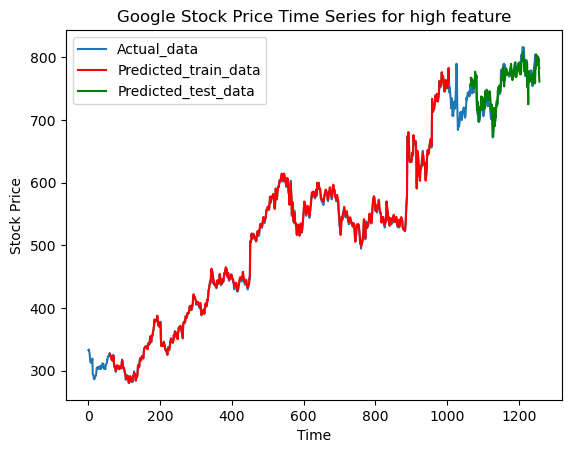

In [27]:

# shift train predictions for plotting
train_plot_high = np.ones_like(timeseries_high) * np.nan
# shift test predictions for plotting
test_plot_high = np.ones_like(timeseries_high) * np.nan

    
train_plot_high[lookback:train_size] = (y_pred_train.reshape(-1,5)[:,1]).reshape(-1,1)
test_plot_high[train_size+lookback:len(timeseries_high)] = (y_pred_test.reshape(-1,5)[:,1]).reshape(-1,1)

# plot
plt.plot(timeseries_high, label='Actual_data')
plt.plot(train_plot_high, c='r', label='Predicted_train_data')
plt.plot(test_plot_high, c='g' , label='Predicted_test_data')
plt.title('Google Stock Price Time Series for high feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

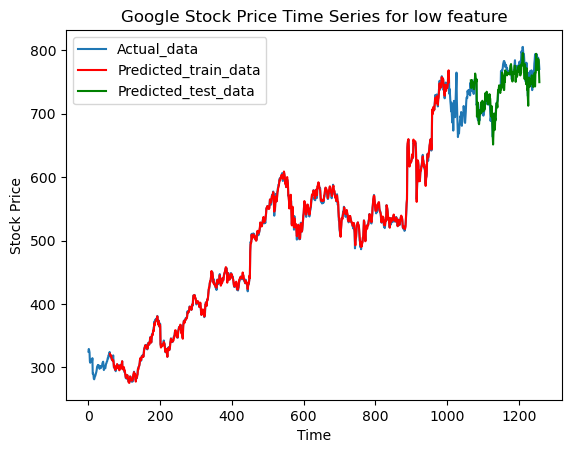

In [31]:

# shift train predictions for plotting
train_plot_low = np.ones_like(timeseries_low) * np.nan
# shift test predictions for plotting
test_plot_low = np.ones_like(timeseries_low) * np.nan

    
train_plot_low[lookback:train_size] = (y_pred_train.reshape(-1,5)[:,2]).reshape(-1,1)
test_plot_low[train_size+lookback:len(timeseries_low)] = (y_pred_test.reshape(-1,5)[:,2]).reshape(-1,1)

# plot
plt.plot(timeseries_low, label='Actual_data')
plt.plot(train_plot_low, c='r',label='Predicted_train_data')
plt.plot(test_plot_low, c='g',label='Predicted_test_data')
plt.title('Google Stock Price Time Series for low feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

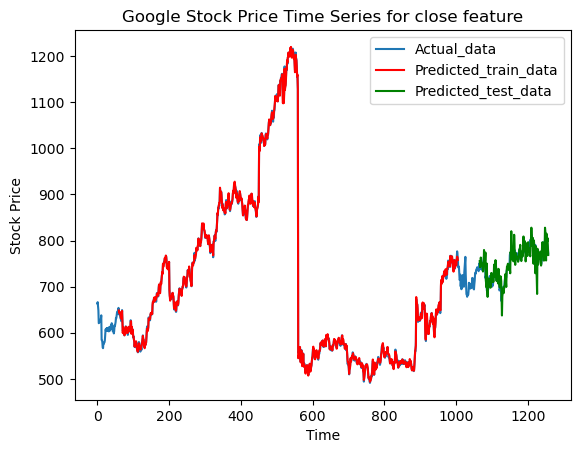

In [32]:

# shift train predictions for plotting
train_plot_c = np.ones_like(c).reshape(-1,1) * np.nan
# shift test predictions for plotting
test_plot_c = np.ones_like(c).reshape(-1,1) * np.nan

#print(train_plot_c.shape)
#print(test_plot_c.shape)
    
train_plot_c[lookback:train_size] = (y_pred_train.reshape(-1,5)[:,3]).reshape(-1,1)
test_plot_c[train_size+lookback:len(c)] = (y_pred_test.reshape(-1,5)[:,3]).reshape(-1,1)

# plot
plt.plot(c,label='Actual_data')
plt.plot(train_plot_c, c='r',label='Predicted_train_data')
plt.plot(test_plot_c, c='g',label='Predicted_test_data')
plt.title('Google Stock Price Time Series for close feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

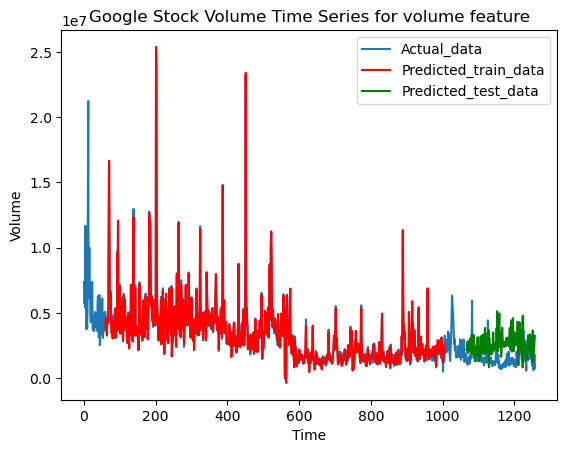

In [33]:

# shift train predictions for plotting
train_plot_v = np.ones_like(timeseries_volume) * np.nan
# shift test predictions for plotting
test_plot_v = np.ones_like(timeseries_volume) * np.nan

    
train_plot_v[lookback:train_size] = (y_pred_train.reshape(-1,5)[:,4]).reshape(-1,1)
test_plot_v[train_size+lookback:len(timeseries_volume)] = (y_pred_test.reshape(-1,5)[:,4]).reshape(-1,1)

# plot
plt.plot(timeseries_volume,label='Actual_data')
plt.plot(train_plot_v, c='r',label='Predicted_train_data')
plt.plot(test_plot_v, c='g',label='Predicted_test_data')
plt.title('Google Stock Volume Time Series for volume feature')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Plotting the test data vs predicted data for open price feature of google stock.

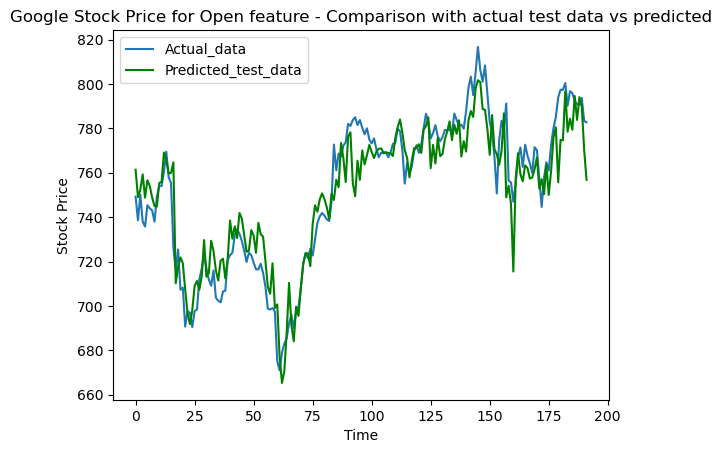

In [35]:

# plot
plt.plot(timeseries_open[train_size+lookback:len(timeseries_open)],label='Actual_data')
#plt.plot(train_plot_open, c='r', label='Predicted_train_data')
plt.plot(test_plot_open[train_size+lookback:len(timeseries_open)], c='g', label='Predicted_test_data')
plt.title('Google Stock Price for Open feature - Comparison with actual test data vs predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Metrics calculation for test data of google stock price open feature.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_data = timeseries_open[train_size+lookback:len(timeseries_open)].flatten()
predicted_data = test_plot_open[train_size+lookback:len(timeseries_open)].flatten()

# Calculate MSE
mse = mean_squared_error(actual_data, predicted_data)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = mean_squared_error(actual_data, predicted_data, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(actual_data, predicted_data)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 141.2115478515625
Root Mean Squared Error (RMSE): 11.883246421813965
Mean Absolute Error (MAE): 9.023072242736816


### Report on the results of the model.

#### LSTM Model configuration:
The ComplexLSTM model is a deep learning architecture designed for sequence prediction tasks, particularly suited for time series forecasting.The model consists of an LSTM layer followed by three fully connected (linear) layers. The input size and the output size is the same as the number of features which is 5. 

All the features are used for model building. The hidden size is set to 64, and there are 2 layers in the LSTM. Dropout with a probability of 0.2 is applied after the LSTM layer to prevent overfitting. The model uses Mean Squared Error (MSE) loss. The Adam optimizer is used for training the model, with a learning rate of 0.001. Overall, the ComplexLSTM model aims to effectively capture and utilize temporal information in input sequences to make accurate predictions for sequence prediction tasks.


#### Training the model.
The forward method of the model defines the forward pass computation. It takes input tensor x and passes it through the LSTM layer followed by the fully connected layers. The hidden states (h0) and cell states (c0) of the LSTM are initialized with zeros. The final output of the model is returned, which represents the predicted values for the input sequences.

Training the mdoel for 200 epochs and printed the train RMSE, test RMSE, loss for every 10 epochs of the total 200 epochs. 

#### Results:
After training the model with 200 epochs, the model's train RMSE, test RMSE, loss are decreasing. Visualized the actual and predicted of train and test data for all the features(Open, Close, Low, Volume, high) of Google stock data. From all the grpahs, it is evident that the predictions of train and test data of all features are very close to the actual train and test data.


Used the open feature, showing the actual and predicted test data for open feature, the model exhibits slight discrepancies, which is expected as predicting stock prices can be challenging and prone to uncertainty. Calculated metrics such as MSE, RMSE, MAE for test data of google stock price open feature. 

The Mean Squared Error (MSE) averages the squared differences between expected and actual prices. The model obtains an MSE of 141.21, indicating that prediction mistakes are quite low in comparison to the actual stock's open price scale.

Root Mean Squared Error (RMSE): This is the square root of the MSE, expressed in the same units as the stock price, making it easier to understand. The model's RMSE is 11.88, meaning that its predictions typically differ from actual prices by about $11.88.

The Mean Absolute Error (MAE) metric averages the absolute discrepancies between predicted and actual values. With an MAE of 9.02, the model's average prediction error is $9.02 off from actual stock prices.

These metrics provide a scorecard for the model's performance. The lower these numbers, the more accurate the model's predictions. Given the complexities of stock price forecasting, these evaluations may be interpreted as reflecting an almost accurate model. 





In [ ]:
github link : 